# 02_Machine Learning_(2)

### 목차

#### 1. 레이블(Label) 인코딩

#### 2. 원핫(One-hot) 인코딩

#### 3.pd.get_dummies(데이터프레임)

#### 4. 결측치 저리

#### 5. Feature Scaling

## 1. 레이블(Label) 인코딩
   - 문자열로된 칼럼(범주형)의 경우 머신러닝에 입력할 수 없다.
   - 그러므로 범주형 칼럼에 의미없는 숫자를 부여하는 과정을 말한다.

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item_label = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

# 문자형 칼럼 Label화 하기
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)
print('encoder 결과 :', digit_label)
print('*'*100)

# Label화 된 칼럼을 원래 문자로 되돌릴때,
print('decoder 결과', encoder.inverse_transform(digit_label))

encoder 결과 : [0 1 4 5 3 2 2]
****************************************************************************************************
decoder 결과 ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '믹서' '믹서']


## 2. 원핫(One-hot) 인코딩
   - 문자열로된 칼럼(범주형)의 경우 머신러닝에 입력할 수 없다.
   - 그러므로 해당 범주에 해당될 경우 1, 아니면 0을 부여하여 범주의 개수만큼 칼럼을 재생성 하는 것을 뜻한다.
   - Label encoding의 경우 의미없는 수치를 부여하여 범주형 칼럼을 대신하지만, 머신러닝은 그 수치를 의미없는 수치로 받아 들이지 않는다.
   - 예를들어 A, B, C 라는 범주를 1, 2, 3으로 Label 했을때, A와 B사이의 거리가 수치적으로 1차이가 난다고 확언할 수 없다.
   - 그래서 보통 Label encoding 보다 One-hot encoding을 많이 사용한다

In [3]:
from sklearn.preprocessing import OneHotEncoder

item_label = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

# 문자형 칼럼 Label화 하기
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)


# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1, 1)
print(digit_label)


# One-hot-encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_result = one_hot_encoder.transform(digit_label)
print(one_hot_result.toarray())

[[0]
 [1]
 [4]
 [5]
 [3]
 [2]
 [2]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 3.pd.get_dummies(데이터프레임)
   - pandas에서는 One-hot encoding을 수행해 주는 함수가 존재하다.
   - 아래 실습코드를 보면 아주 간단히 진행됨을 확인할 수 있다.

In [4]:
item_label = ['TV', '냉장고', '전자레인지', '컴퓨터', '컴퓨터', '컴퓨터', '컴퓨터', '선풍기', '믹서', '믹서']
onehot_df = pd.DataFrame({
    'item_label' : item_label
})




print('pd.get_dummies 적용전')
display(onehot_df)

print('pd.get_dummies 적용후')
display( pd.get_dummies(onehot_df) )

pd.get_dummies 적용전


,item_label
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,컴퓨터
5,컴퓨터
6,컴퓨터
7,선풍기
8,믹서
9,믹서


pd.get_dummies 적용후


,item_label_TV,item_label_냉장고,item_label_믹서,item_label_선풍기,item_label_전자레인지,item_label_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
7,0,0,0,1,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


## 4. 결측치 저리

In [5]:
# 결측값을 가진 데이터를 만들어보자

from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [6]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


### 결측된 데이터를 처리하는 방법
   - 결측된 데이터가 너무 많다고 판단이 될 경우 해당 데이터 열을 삭제하라
   - 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체

In [7]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


### df.dropna(thresh=7)
   - `thresh`옵션 : `thresh=7`이라 함은 결측치가 아닌 값의 개수가 7개 미만인 경우 행또는 열을 삭제한다.
   - 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다.

In [8]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


##### 결측치가 과반 수 이상인 `deck`칼럼을 지워보자
   - 칼럼을 기준으로 결측치의 비율이 50% 이상인 칼럼을 지우자

In [15]:
titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1, inplace=True)
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


##### 결측 데이터를 대체하는 방법
   - skit-learn에서 제공하는 `SimpleImputer`라는 클래스는 결측치를 대체하는 함수이다.
       - 평균, 중앙, 최빈으로 결측을 대체한다. (사실 이 방법은 추천하지 않는 방법이다.)
   - fit_transform() : 대체값이 채워진 데이터 프레임을 생성할 수 있다.

In [16]:
# 결측치 처리를 위한 import
from sklearn.impute import SimpleImputer

##### 결측치를 대체하는 값
   - mean, median, most_frequent

In [22]:
imputer = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


##### missingno
   - 패키지 설치
        - 아나콘다 프롬프트에서 `conda install -c conda-forge/label/cf202003 missingno`
   - 결측 데이터를 시각화 하는 패키지이다.


In [9]:
import missingno as msno

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### msno.matrix()
   - 데이터프레임을 매트릭스 형태로 시각화 해준다. 하얀부분이 결측값이다.

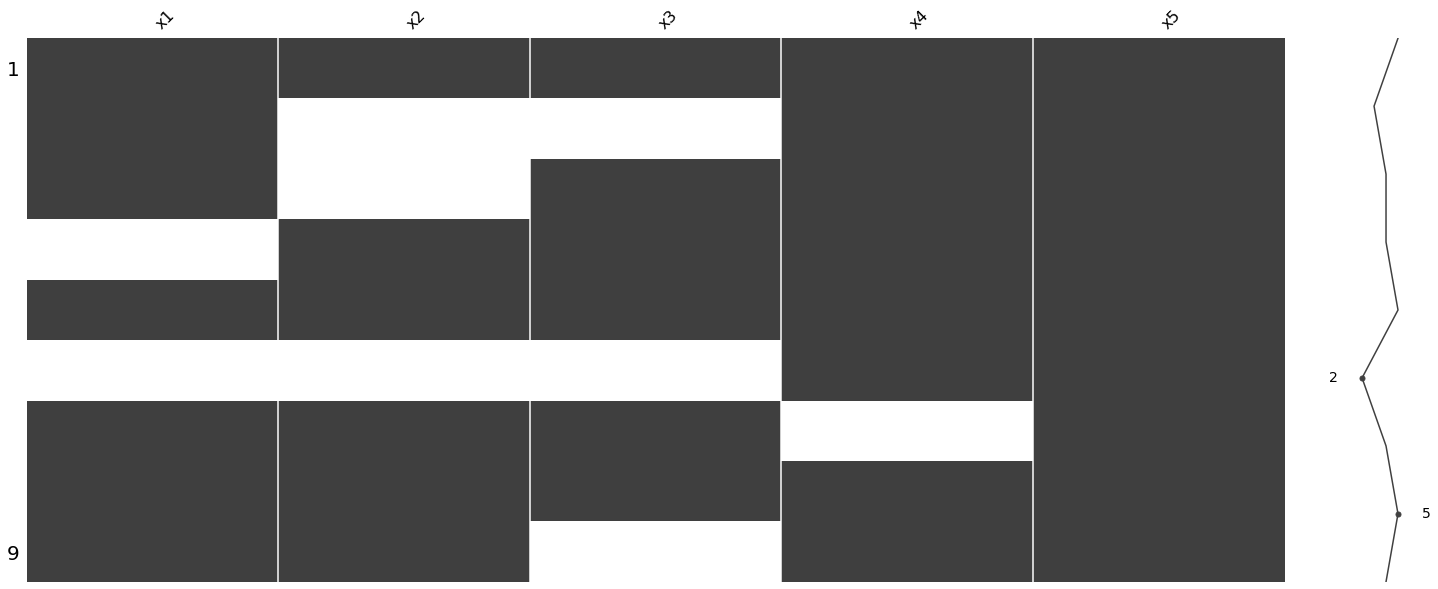

In [10]:
msno.matrix(df)
plt.show()

##### msno.bar()
   - 데이터프레임의 칼럼별로 결측치가 아닌 데이터의 비율을 막대형태로 보여준다.

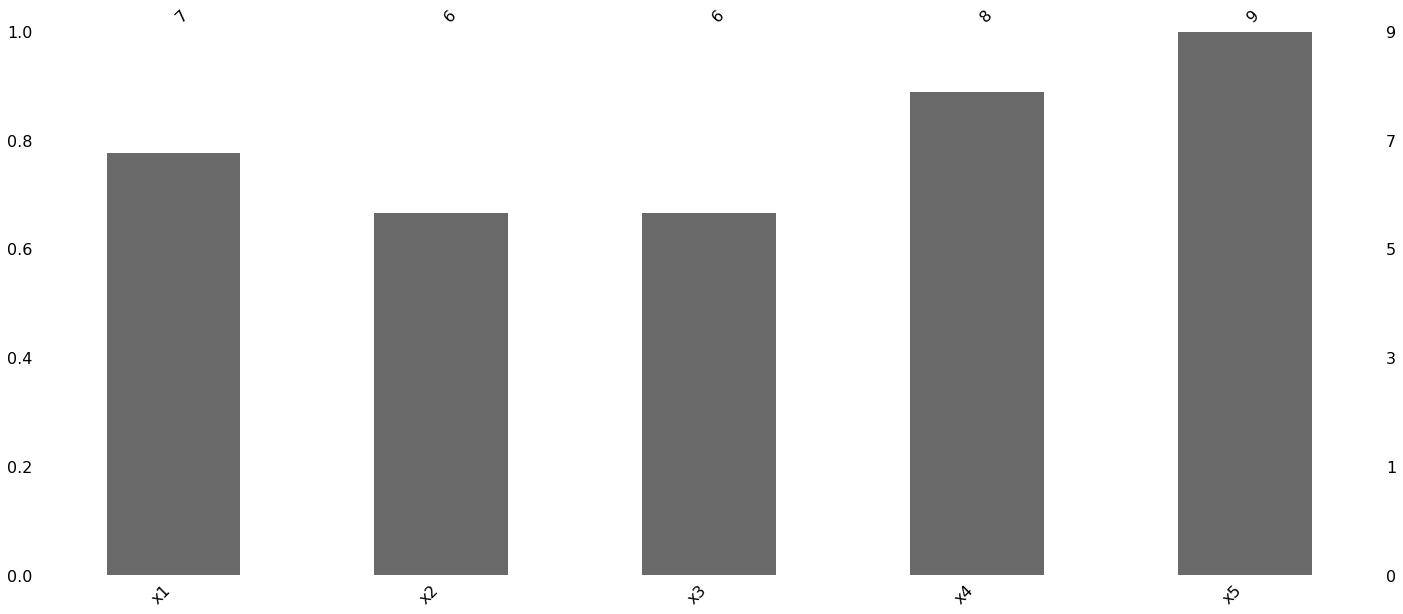

In [11]:
msno.bar(df)
plt.show()

##### missingno를 사용하여 타이타닉 데이터에서 `age`, `deck`, `embarked`, `embark_town` 열에 대한 결측데이터를 확인해보라.

In [12]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


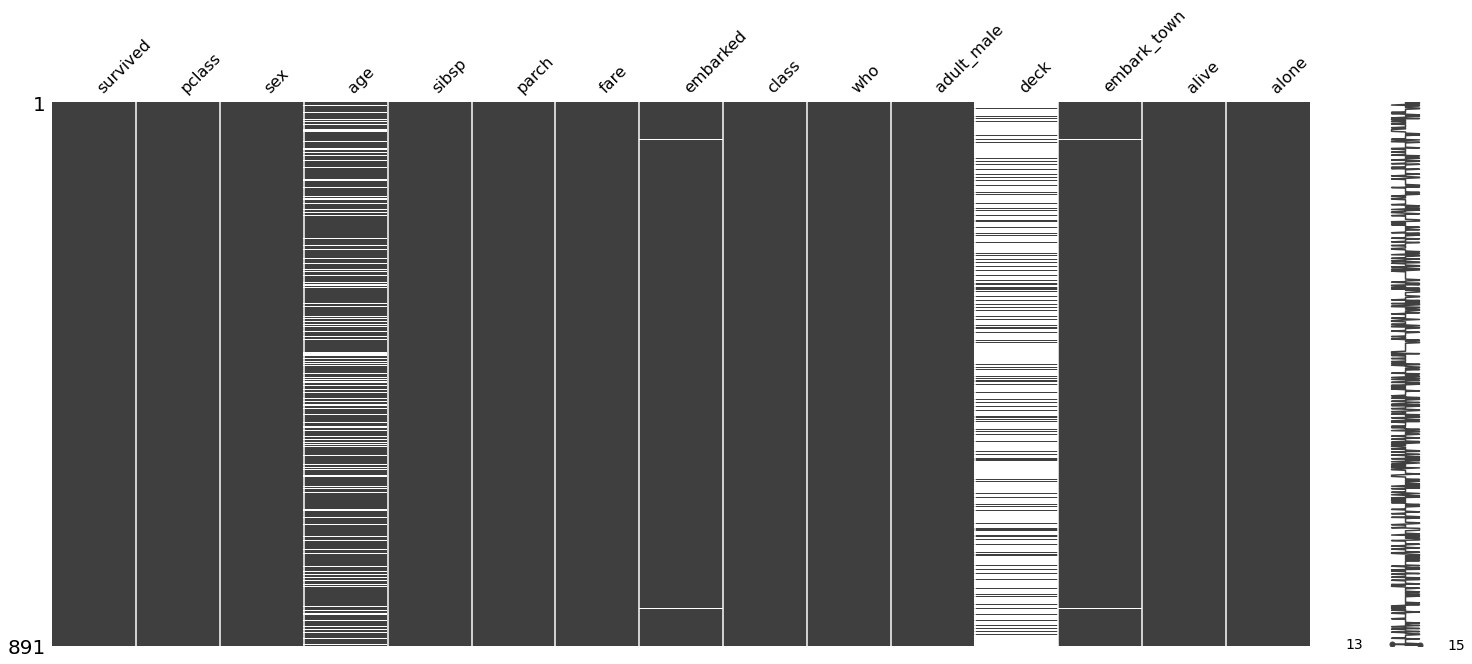

In [13]:
msno.matrix(titanic)
plt.show()

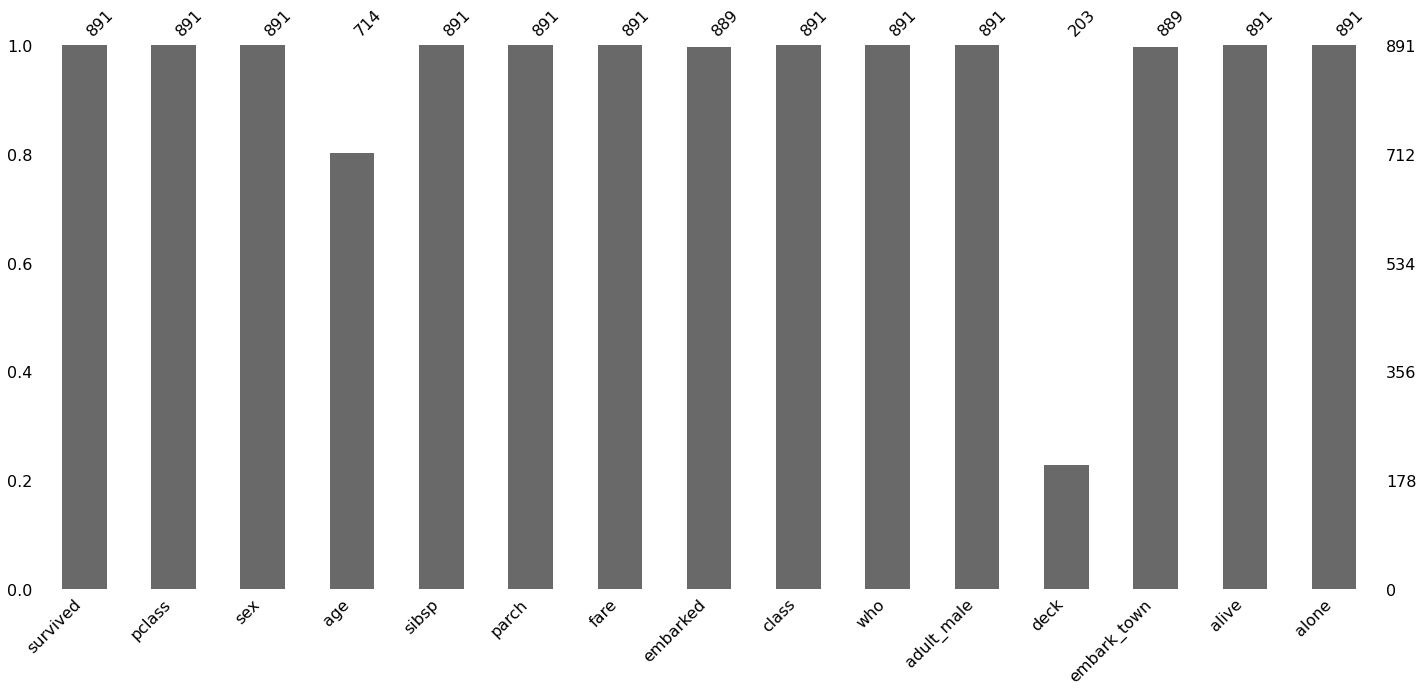

In [14]:
msno.bar(titanic)
plt.show()

##### titanic 데이터의 `embark_town`을 살펴보자

C:\Users\lan41\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='embark_town', ylabel='count'>

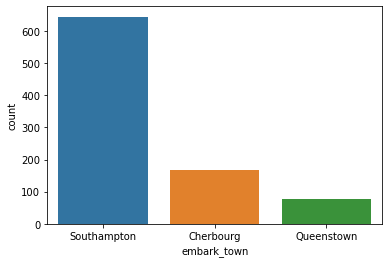

In [23]:
sns.countplot(titanic.embark_town)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

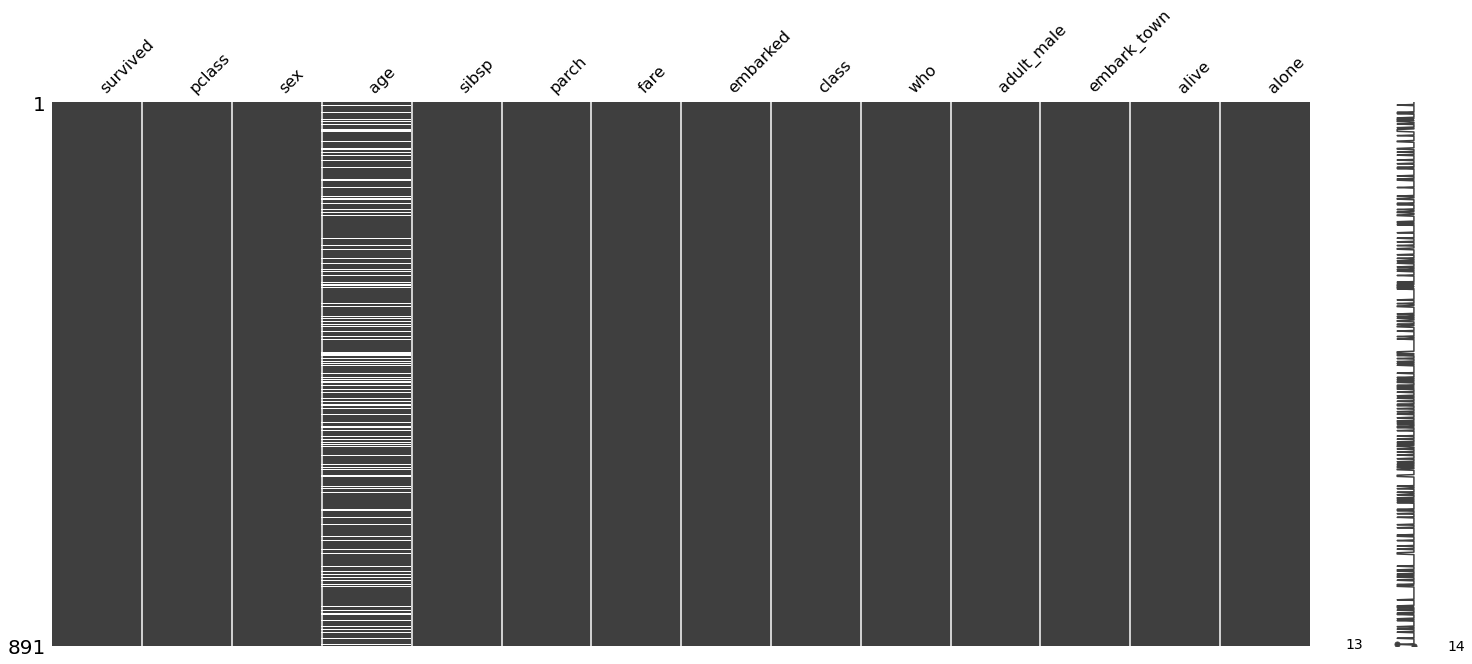

In [32]:
# 결측치 처리를 위한 import
from sklearn.impute import SimpleImputer

# 결측치를 무엇으로 대체할 것입니까?
titanic_embark_town_imputer = SimpleImputer(strategy = 'most_frequent')

# 범주형 칼럼의 결측치를 최빈 범주 값으로 대체한다.
titanic['embark_town'] = titanic_embark_town_imputer.fit_transform(titanic[['embark_town']])
titanic['embarked'] = titanic_embark_town_imputer.fit_transform(titanic[['embarked']])
display(titanic.head())

# 결측치 시각화
msno.matrix(titanic)

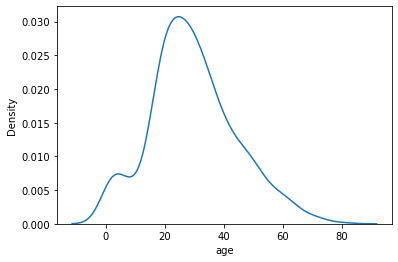

In [33]:
# 확인 결과 age 열만 결측값을 가지고 있고
# 수치형일 경우 데이터 분포 확인하고,
# 어떻게 대체할 것인지를 고민

sns.kdeplot(titanic.age)
plt.show()

<AxesSubplot:>

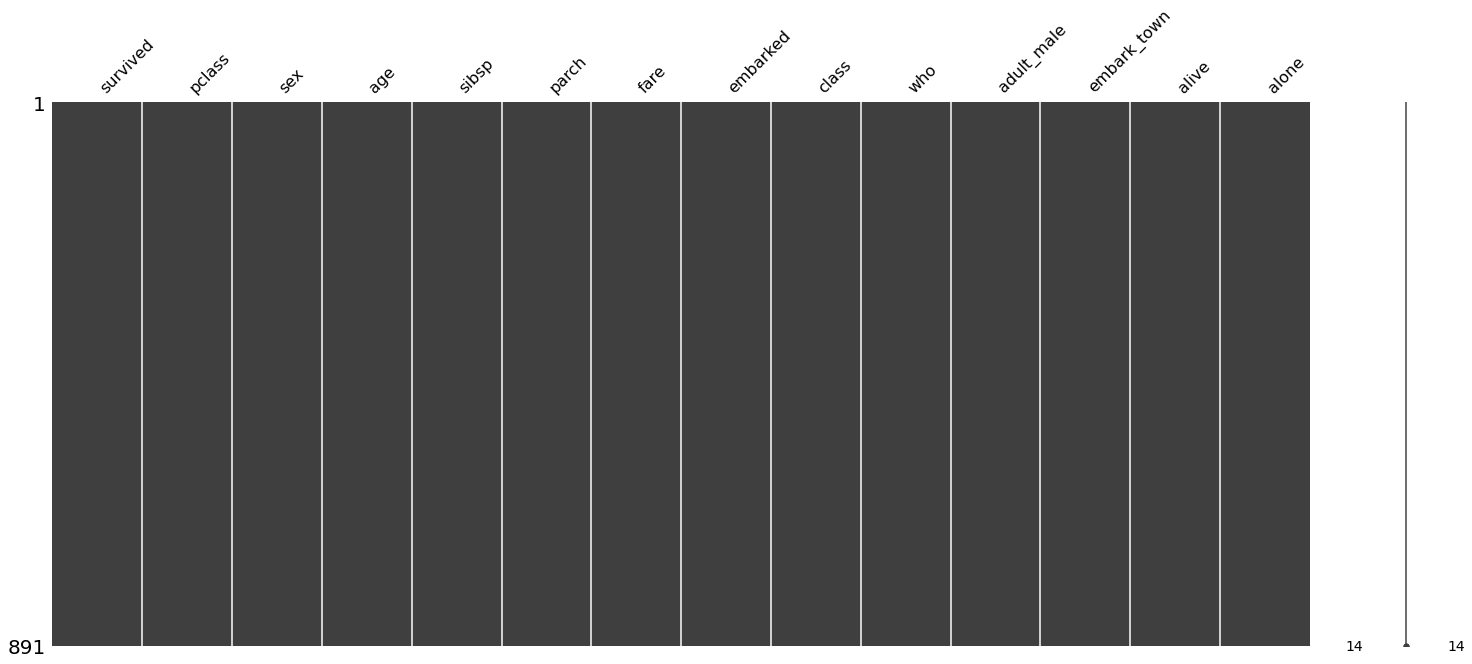

In [35]:
# age 중앙값으로 대체한다면?
# 결측치 처리를 위한 import

from sklearn.impute import SimpleImputer

# 결측치를 무엇으로 대체할 것입니까?
titanic_age_town_imputer = SimpleImputer(strategy = 'median')

# age 칼럼의 결측치를 중앙값으로 대체한다.
titanic['age'] = titanic_embark_town_imputer.fit_transform(titanic[['age']])

# 결측치 시각화
msno.matrix(titanic)

 - 하얀부분이 없다 = 결측치가 전부 사라졌다

## 5. Feature Scaling
> - Feature Scaling이 무조건 머신러닝 성능을 향상시킨다는 보장은 없다. 하지만, 데이터에 따라 분명히 성능이 향상되는 경우가 존재하기에 아주 중요한 전처리과정 중에 하나라고 할 수있다.
> - 그러므로 분석가의 판단하에 필요하다고 생각되면 사용하자
   1. **표준화** : 평균과 표준편차를 이용하여 칼럼(Feature)들이 표준 정규분포를 따르도록 스케일링 하는 과정이다
       - StandardScaler()
       - `정규화`에 비해 이상치에 민감하지 않다.
  
       
       
       
       
   2. **정규화** : 칼럼(Feature)들의 단위 차이가 많이 나는 경우, 칼럼끼리의 단위를 맞추기 위해 스케일링 하는 과정이다. 양수만 존재하는 경우 `0~1` 사이값을, 음수가 존재하는 경우 `-1~1` 사이의 값을 반환한다.
       - MinMaxScaler()
       - `표준화`에 비해 이상치에 민감하다.
           - 이상치가 존재하는 경우 이상치는 1에 가까운 값을 반환하지만, 이상치를 제외한 모든 값은 0에 가까운 값을 반환한다.

##### Feature Scaling 실습

In [37]:
df = pd.DataFrame({
    'A':[14.00,90.20,90.95,96.27,91.21],
    'B':[103.02,107.26,110.35,114.23,114.68], 
    'C':['big','small','big','small','small']
})

display(df)

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


##### 표준화와 정규화의 식을 이용하여 함수를 구현해 보았다

In [46]:
def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df


In [48]:
# 정규화
feture_scaling(df, column=['A', 'B'], scaling_strategy="min-max")

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


In [49]:
# 표준화
feture_scaling(df, column=['A', 'B'], scaling_strategy="z-score")

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


##### scikit-learn에서 제공하는 표준화, 정규화 함수를 사용해보자

In [66]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns = ['Class_label', 'Alcohol', 'Malic_acid']

df.head(10)

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


##### MinMaxScaler() /  StandardScaler()
 - 사용법
     - `m = MinMaxScaler()` or `m = StandardScaler()` : 사용하고자 하는 Feature Scailing 객체를 생성한다
     - `m.fit(train_df)` : 기준점이 되는 데이터프레임 셋(정규화의 경우 최대 최소, 표준화의 경우 평균, 표준편차)을 지정한다
     - `m.transform(test_df)` : Scailing을 적용한다

##### 정규화
##### MinMaxScaler()

In [67]:
from sklearn.preprocessing import MinMaxScaler

df2 = df.copy()

mm_scaler = MinMaxScaler()
mm_scaler.fit(df[['Alcohol', 'Malic_acid']])
df2[ ['Alcohol', 'Malic_acid'] ] = mm_scaler.transform(df[['Alcohol', 'Malic_acid']])

display(df.head(10))
display(df2.head(10))



,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


,Class_label,Alcohol,Malic_acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613
5,1,0.834211,0.201581
6,1,0.884211,0.223320
7,1,0.797368,0.278656
8,1,1.000000,0.177866
9,1,0.744737,0.120553


##### 표준화
##### StandardScaler()

In [73]:
from sklearn.preprocessing import StandardScaler

df3 = df.copy()

stardard_scaler = StandardScaler()
stardard_scaler.fit(df[['Alcohol', 'Malic_acid']])
df3[['Alcohol', 'Malic_acid']] = stardard_scaler.transform(df[['Alcohol', 'Malic_acid']])

display(df.head(10))
display(df3.head(10))

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


,Class_label,Alcohol,Malic_acid
0,1,1.518613,-0.562250
1,1,0.246290,-0.499413
2,1,0.196879,0.021231
3,1,1.691550,-0.346811
4,1,0.295700,0.227694
5,1,1.481555,-0.517367
6,1,1.716255,-0.418624
7,1,1.308617,-0.167278
8,1,2.259772,-0.625086
9,1,1.061565,-0.885409


In [74]:
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [85]:
scaler = MinMaxScaler()
scaler.fit(train_array)

scaler_train = scaler.transform(train_array)
scaler_test = scaler.transform(test_array)

print('raw train data    :', np.round( train_array.reshape(-1), 2 ))
print('scaled train data :', np.round( scaler_train.reshape(-1), 2 ))
print('-'*100)
print('raw test data    :', np.round( test_array.reshape(-1), 2 ))
print('scaled test data :', np.round( scaler_test.reshape(-1), 2 ))

raw train data    : [ 0  1  2  3  4  5  6  7  8  9 10]
scaled train data : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
----------------------------------------------------------------------------------------------------
raw test data    : [0 1 2 3 4 5]
scaled test data : [0.  0.1 0.2 0.3 0.4 0.5]


##### 데이터분석에서 `Feature Scailing`을 적용할 때 주의사항
   - `Hold Out` 방식을 적용하든 `K-Fold` 방식을 적용하든 Train set과 Test set이 존재한다.
   - 머신러닝 방법론에서 Train set과 Test set은 동일한 분포를 따른다고 가정한다.
   - 또한, 머신러닝 방법론에서 Test set은 Train set에 영향을 주어선 절대 안된다.
   - 왜냐하면 Test set은 예측에만 사용되어야 하기에, 학습에 어떠한 방식으로든지 영항을 미쳐선 안되기 때문이다.
   - 그러므로 `Feature Scailing`을 적용하려면.. 
       - MinMax의 경우로 예를들면, Train set의 최대 최소값을 이용하여 Test set의 MinMaxScaling을 적용해야한다.
       - **절대로 Test set의 최대 최소값을 이용하여 MinMaxScailing을 적용해서는 안된다.**
       - 왜냐하면, **머신러닝은 Test set과 Train set의 각 칼럼들은 동일한 분포를 따른다고 가정하고 예측을 수행**한다.
       - 만약 train set은 train set의 최대 최소값을 이용해 scail을 진행하고, Test set은 Test set의 최대 최소값을 이용해 scail을 진행한다면, 서로의 최대 최소값이 다르기 때문에 본질적으로 **서로 다른 분포를 같게 만드는 꼴**이기 때문이다.
       - 또한, **Train + Test를 합친 데이터 셋에서 최대 최소값을 이용해 MinMaxScailing을 적용해서도 안된다.**
       - 왜냐하면, Train + Test를 합친 데이터 셋은 Test set을 포함하고 있기 때문에 Train + Test를 합친 데이터 셋의 최대 최소값을 이용하여 Scailing을 진행한 값으로 학습을 진행하는 것은 Test set이 학습에 영향을 미치는 꼴이 되기 때문이다.

##### `iris` 데이터를 이용한 Feaure Scailing

In [87]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [88]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64
